<a href="https://colab.research.google.com/github/jbmw94/plantnetSimplon/blob/master/Application_Projet_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive                  
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flask-ngrok

In [1]:
!pip install streamlit

In [3]:
!pip install streamlit -q

In [4]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -qq ngrok-stable-linux-amd64.zip

--2020-10-19 10:53:03--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.200.34.1, 107.21.11.91, 3.213.190.117, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.200.34.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  14.3MB/s    in 0.9s    

2020-10-19 10:53:04 (14.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]



In [5]:
get_ipython().system_raw('./ngrok http 8501 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


In [6]:
!streamlit hello


  Welcome to Streamlit. Check out our demo in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.76.87.179:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!

  Stopping...


In [7]:
!pip install -U ipykernel

Requirement already up-to-date: ipykernel in /usr/local/lib/python3.6/dist-packages (5.3.4)


In [8]:
!pip install -q streamlit

In [9]:
!pip install  pyngrok

  Created wheel for pyngrok: filename=pyngrok-4.2.2-cp36-none-any.whl size=18025 sha256=b87ae6af7574fab1e44a62355af6ee9f89d90e4094f0818cfb34b304fc962ff2
  Stored in directory: /root/.cache/pip/wheels/9c/d3/b5/502fbef4b2782a6142bc00c62ccde76ee04c9148fb43b1b2cd
Successfully built pyngrok


%%writefile Perso_Nintendo.py

import streamlit as st
import tensorflow as tf
import numpy as np
from  PIL import Image
import requests
from io import BytesIO

st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('Nintendo Characters classifier')
st.text('Indiquer le lien:')

@st.cache(allow_output_mutation=True)
def load_model():
    model = tf.keras.models.load_model('/content/Model_VGG16_Projet_final_jpeg.h5') 
    return model

with st.spinner('Loading Model Into Memory....'):
  model = load_model()

class_names = ['Daisy', 'Yoshi', 'Harmonie', 'Waluigi', 'Professor Layton', 'Phoenix Wright', 'Donkey Kong', 'Captain Falcon', 
               'Luigi', 'Mario' , 'Link', 'Pikachu', 'Toad', 'Tiny Kong', 'Fox']

def scale(image):
  image = tf.cast(image, tf.float32)
  image /= 255.0

  return tf.image.resize(image,[224,224])

def decode_image(image):
  img = tf.image.decode_jpeg(image, channels = 3)
  img = scale(img)
  return np.expand_dims(img, axis = 0)

path = st.text_input('Entrer le lien: ','https://drive.google.com/drive/folders/1nUapvDIUO-L3TbU3oomV6wYitkjHd1tN')
if path is not None:
  content = requests.get(path).content

  st.write("Classes prédises:")
  with st.spinner('classifying.....'):
    label = np.argmax(model.predict(decode_image(content)),axis = 1)
    st.write(class_names[label[0]])

  st.write("")
  image = Image.open(BytesI0(content))
  st.image(image, caption='Classifying news Images', use_column_width=True)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
!ls

 imagenet			      ngrok-stable-linux-amd64.zip
'Modèle_VGG16_Projet_final(1).json'   sample_data
 ngrok


In [11]:
!ngrok authtoken 1iuk6EzaGgjA4PYXHQmiO3ub42O_6ajTjDFZJvSdbYRF8U5dD

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [12]:
!ngrok

NAME:
   ngrok - tunnel local ports to public URLs and inspect traffic

DESCRIPTION:
    ngrok exposes local networked services behinds NATs and firewalls to the
    public internet over a secure tunnel. Share local websites, build/test
    webhook consumers and self-host personal services.
    Detailed help for each command is available with 'ngrok help <command>'.
    Open http://localhost:4040 for ngrok's web interface to inspect traffic.

EXAMPLES:
    ngrok http 80                    # secure public URL for port 80 web server
    ngrok http -subdomain=baz 8080   # port 8080 available at baz.ngrok.io
    ngrok http foo.dev:80            # tunnel to host:port instead of localhost
    ngrok http https://localhost     # expose a local https server
    ngrok tcp 22                     # tunnel arbitrary TCP traffic to port 22
    ngrok tls -hostname=foo.com 443  # TLS traffic for foo.com to port 443
    ngrok start foo bar baz          # start tunnels from the configuration file

VERSI

In [13]:
!nohup streamlit run Perso_Nintendo.py &

nohup: appending output to 'nohup.out'


In [ ]:
#!streamlit run Perso_Nintendo.py &>/dev/null&

In [14]:
!pgrep streamlit

669


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port = '8501')
url

In [ ]:
#!kill 750

In [ ]:
#!kill 895

In [ ]:
#!kill 1032

In [ ]:
#!kill 1126

In [ ]:
#!ngrok.kill()

In [ ]:
!cat nohup.out

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored

In [27]:
@app.route('/')
def index():

	return "Hello datacorner.fr !"

if __name__ == '__main__':

	  app.run(debug=True, host='0.0.0.0', port=8080)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: ignored

In [15]:
pip install Starlette


In [16]:
pip install aiofiles


In [17]:
pip install uvicorn


In [18]:
pip install aiohttp


In [19]:
pip install python-multipart

In [20]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [21]:
from fastai.vision import *
from fastai.widgets import *

In [22]:
from io import BytesIO

In [23]:
import fastai
print(f'fastai: {fastai.__version__}')
print(f'cuda: {torch.cuda.is_available()}')

fastai: 1.0.61
cuda: True


In [24]:
path = '/content/'
os.makedirs(path+'imagenet/', exist_ok=True)
path = path+'imagenet/'

In [25]:
import urllib.request, json

# Distant json file
# url_json = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'
# with urllib.request.urlopen(url_json) as url:
#     class_idx = json.loads(url.read().decode())
    
# local json file 
json_file = json.load(open(path+'imagenet_class_index.json'))

classes = [json_file[str(k)][1] for k in range(len(json_file))]

In [26]:
classes[:10]

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich']

In [27]:

classes = [classes[i].split(',', 1)[0] for i in range(len(classes))]

In [28]:
classes[:10]

['tench',
 'goldfish',
 'great_white_shark',
 'tiger_shark',
 'hammerhead',
 'electric_ray',
 'stingray',
 'cock',
 'hen',
 'ostrich']

In [29]:

model = models.resnet50(pretrained=True)
model = nn.Sequential(model, nn.LogSoftmax(dim=1))

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [ ]:
# Transformation to apply to image before prediction (center crop)
# tfms = get_transforms() is possible too
tfms = [ [], [crop_pad()] ]

In [30]:
model_name = 'Modèle_VGG16_Projet_final(1)'
# Import the learner object
# Tutorial online at https://docs.fast.ai/tutorial.inference.html
learn = load_learner(path, f'{model_name}.h5')


UnpicklingError: ignored

In [33]:
import streamlit as st
import tensorflow as tf
import numpy as np
from  PIL import Image
import requests
from io import BytesIO

st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('Nintendo Characters classifier')
st.text('Indiquer le lien:')

#@st.cache(allow_output_mutation=True)
def load_model():
    learn = tf.keras.models.load_model('/content/imagenet/Modèle_VGG16_Projet_final(1).h5') 
    return learn

with st.spinner('Loading Model Into Memory....'):
  learn = load_model()

In [46]:
images = [
          #('luigi', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT3YjFoMsCv27wVqdSPi144kPtU6AxbnGy1Bw&usqp=CAU'), 
          ('professeur layton', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSwirQotVVH0QOLC9TcwfdPe0uwpgcqnoOy-A&usqp=CAU'), 
          ('phoenix wright', 'https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQZR1uRVIlGLNVVwGcJUwvow9ebeYTzjirmSA&usqp=CAU')
         ]

ValueError: ignored

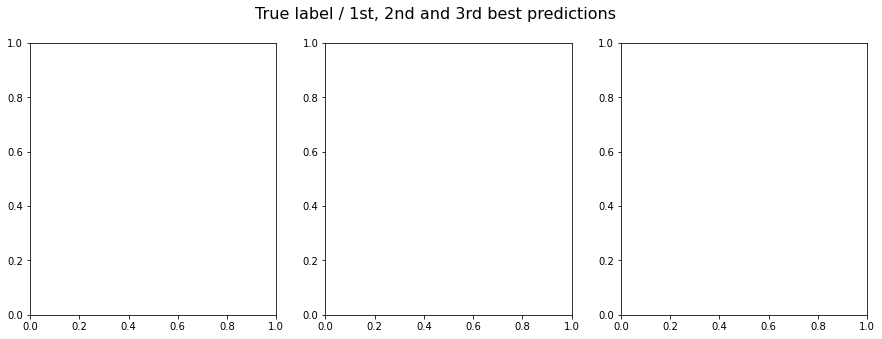

In [47]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('True label / 1st, 2nd and 3rd best predictions', fontsize=16)

for i, image in enumerate(images):
    
    # Get image
    class_name, img_url = image[0], image[1]
    response = requests.get(img_url)
    img = open_image(BytesIO(response.content))

    # Get best first prediction
    pred_1_class, indice, preds = learn.predict(img)

    # Get all best predictions
    preds_sorted, idxs = preds.sort(descending=True)
    
    # Get best 3 predictions - classes
    pred_2_class = learn.data.classes[idxs[1]]
    pred_3_class = learn.data.classes[idxs[2]]
    
    # Get best 3 predictions - probabilities
    pred_1_prob = np.round(100*preds_sorted[0].item(),2)
    pred_2_prob = np.round(100*preds_sorted[1].item(),2)
    pred_3_prob = np.round(100*preds_sorted[2].item(),2)
    preds_best3 = [f'{pred_1_class} ({pred_1_prob}%)', f'{pred_2_class} ({pred_2_prob}%)', f'{pred_3_class} ({pred_3_prob}%)']
    
    # Display images with True label / 1st, 2nd and 3rd best Predictions
    img.show(ax=ax[i],
             title=f'(true label) {class_name}\n(1st) {preds_best3[0]}\n(2nd) {preds_best3[1]}\n(3rd) {preds_best3[2]}')

In [ ]:
# Display and run the Web App into the notebook
from IPython.display import IFrame
IFrame('http://localhost:5042/', width='100%', height=520)